# Imports

In [787]:
import re
import pandas  as pd
import seaborn as sns
import numpy   as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [788]:
from typing import List, Union

In [789]:
plt.style.use('dark_background')

# Load Train Data

In [790]:
train_data_raw= pd.read_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\data\train.csv",
                        index_col='id')

In [791]:
train_data_raw.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [792]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [793]:
train_data_raw.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Data Columns by `dtype`

In [794]:
TARGET = 'Depression'

In [795]:
YES_NO_COLS = ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

In [796]:
CAT_COLS = train_data_raw.select_dtypes(object).columns.tolist()
CAT_COLS = [col for col in CAT_COLS if col not in YES_NO_COLS]
print(CAT_COLS)

['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


In [797]:
NUM_COLS = train_data_raw.select_dtypes([np.number]).columns.tolist()
NUM_COLS.remove(TARGET)
print(NUM_COLS)

['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [798]:
len(train_data_raw.columns) == (len(NUM_COLS) + len(CAT_COLS) + len(YES_NO_COLS) + 1)

True

# Raw Exploration

In [799]:
def annot_plot(ax):
    for i in ax.containers:
        ax.bar_label(i)

## Depressed Population Exploration (Raw Training Data)

In [800]:
dprsd_df = train_data_raw.loc[train_data_raw[TARGET] == 1]
dprsd_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1


### Professional or Student 

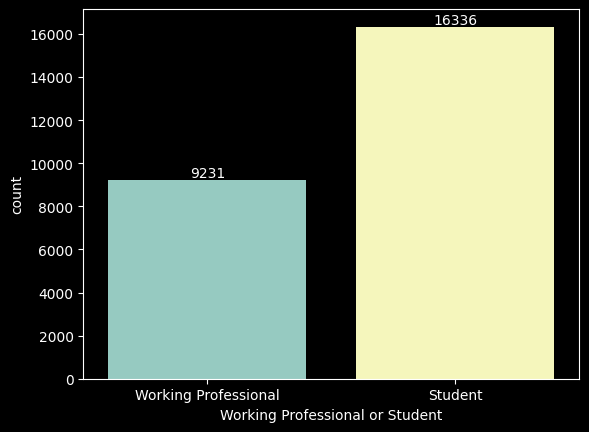

In [801]:
ax = sns.countplot(dprsd_df, x='Working Professional or Student', hue='Working Professional or Student', legend=False)
annot_plot(ax)

### Work Pressure

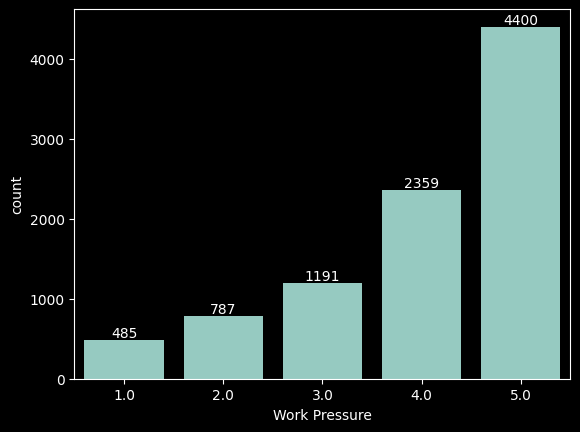

In [802]:
ax = sns.countplot(dprsd_df, x='Work Pressure')
annot_plot(ax)

### Job Satisfaction

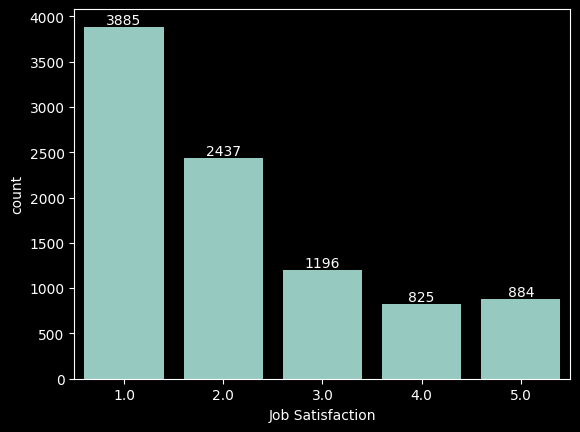

In [803]:
ax = sns.countplot(dprsd_df, x='Job Satisfaction')
annot_plot(ax)

### Work/Study Hours

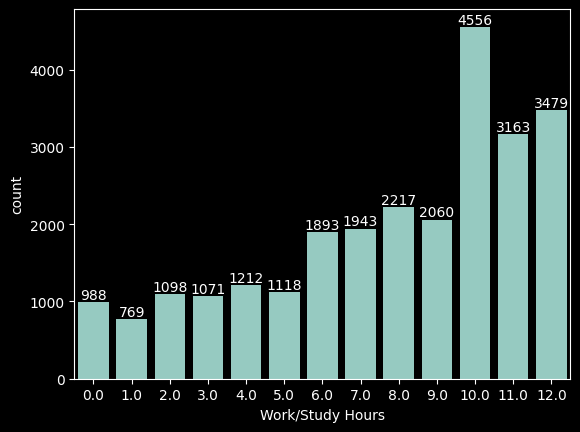

In [804]:
ax = sns.countplot(dprsd_df, x='Work/Study Hours')
annot_plot(ax)

### Financial Stress

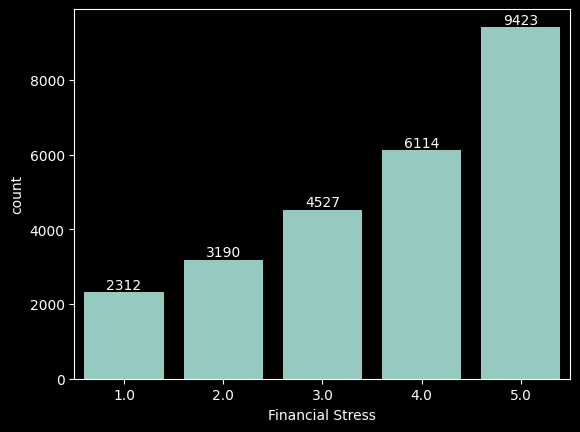

In [805]:
ax = sns.countplot(dprsd_df, x='Financial Stress')
annot_plot(ax)

### Family History of Mental Illness

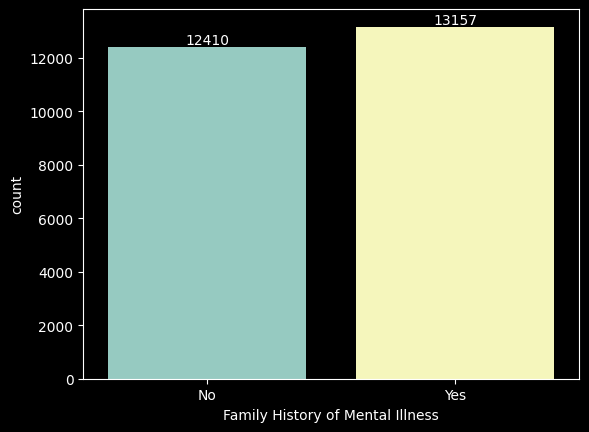

In [806]:
ax = sns.countplot(dprsd_df, x='Family History of Mental Illness', hue='Family History of Mental Illness', legend=False)
annot_plot(ax)

### Have you ever had suicidal thoughts ?

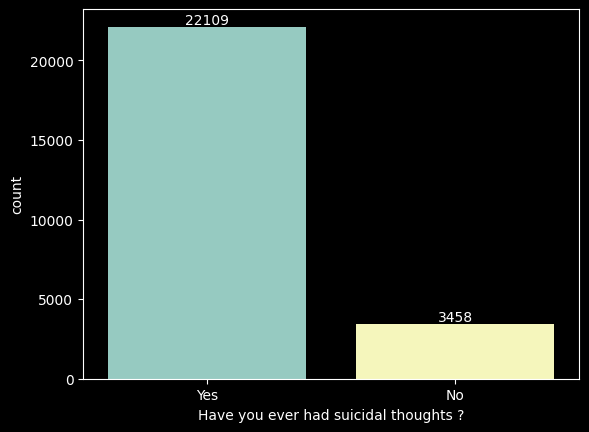

In [807]:
ax = sns.countplot(dprsd_df, x='Have you ever had suicidal thoughts ?',  hue='Have you ever had suicidal thoughts ?', legend=False)
annot_plot(ax)

### Age

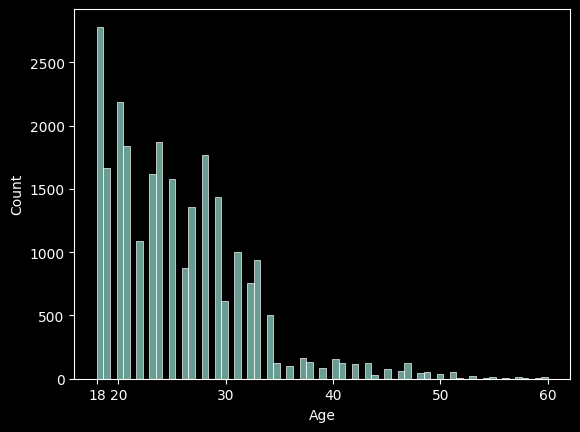

In [808]:
sns.histplot(dprsd_df, x='Age')
plt.xticks([dprsd_df['Age'].min(), 20, 30, 40, 50, dprsd_df['Age'].max()])
plt.show()

### Profession

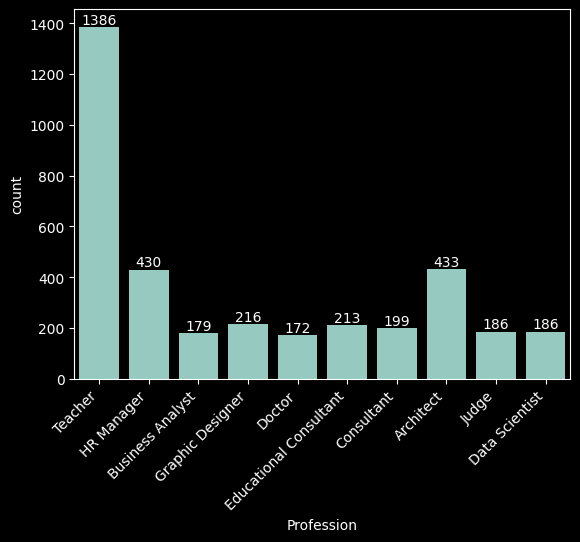

In [809]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Profession"].isin(dprsd_df['Profession'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Profession' ]], x='Profession')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Dietary Habits

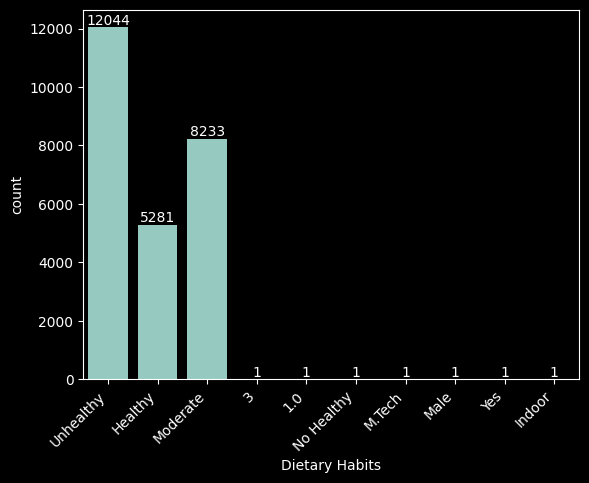

In [810]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Dietary Habits"].isin(dprsd_df['Dietary Habits'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Dietary Habits' ]], x='Dietary Habits')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Sleep Duration


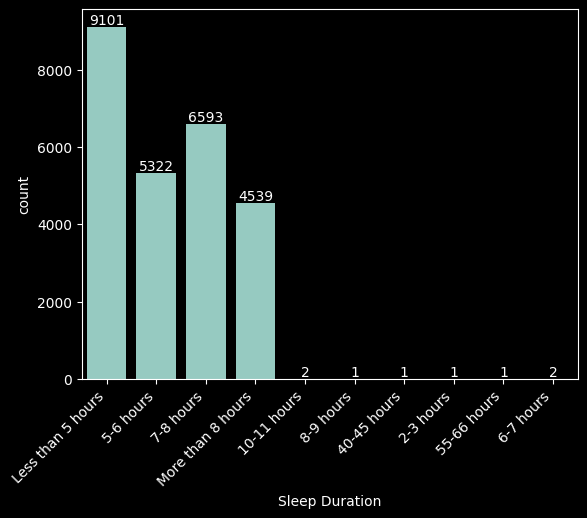

In [811]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Sleep Duration"].isin(dprsd_df['Sleep Duration'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Sleep Duration' ]], x='Sleep Duration')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Degree

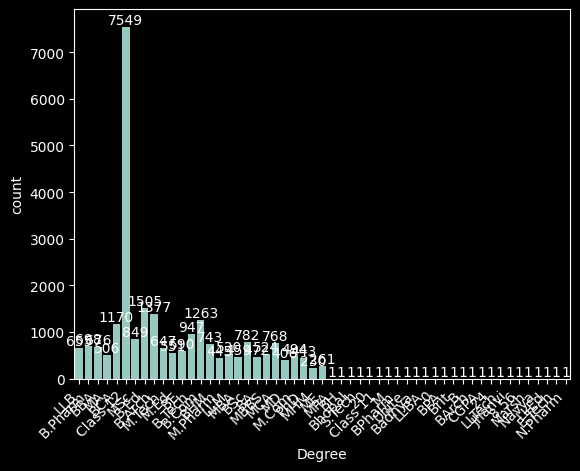

In [812]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Degree"].isin(dprsd_df['Degree'].value_counts().index.tolist()), [TARGET, 'Degree' ]], x='Degree')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [813]:
train_data = train_data_raw.copy()

# Nulls

## Drop Columns w/ Nulls Over Threshold

In [814]:
# def drop_over_thrsld_nulls_cols(data: pd.DataFrame, nulls_threshold: float = 0.45):
#     nulls_proportion = data.isnull().sum() / len(data)
#     nulls_more_thrsld = nulls_proportion[nulls_proportion.ge(nulls_threshold)].index.tolist()
#     nulls_less_thrsld = nulls_proportion[nulls_proportion.lt(nulls_threshold)].index.tolist()
#     print(f"By the threshold: {nulls_threshold}\nDropped the next columns:\n{nulls_proportion[nulls_more_thrsld]}")
#     data.drop(nulls_more_thrsld, axis=1, inplace=True)

#     return nulls_more_thrsld

In [815]:
# dropped_columns_list = drop_over_thrsld_nulls_cols(train_data)
# dropped_columns_list

In [816]:
# NUM_COLS    = [col for col in NUM_COLS    if col not in dropped_columns_list]
# CAT_COLS    = [col for col in CAT_COLS    if col not in dropped_columns_list]
# YES_NO_COLS = [col for col in YES_NO_COLS if col not in dropped_columns_list]

# print(YES_NO_COLS, NUM_COLS, CAT_COLS, sep='\n')

## Handle Nulls

### Student  / Professional Related Nulls

In [817]:
train_data.loc[(train_data['Working Professional or Student']=='Student') & ( ~train_data['Profession'].isna())].head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
2105,Shreya,Female,31.0,Vadodara,Student,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1
9483,Vidya,Female,32.0,Kalyan,Student,UX/UI Designer,3.0,NaN,9.60,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1
11470,Anjali,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.50,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1


In [818]:
train_data.loc[train_data['Working Professional or Student']=='Student', 'Profession'].value_counts(dropna=False)

Profession
NaN                       27867
Architect                     8
Teacher                       6
Student                       3
Digital Marketer              3
Content Writer                2
Chef                          2
Pharmacist                    2
Doctor                        2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

#### Profession

In [819]:
train_data.loc[train_data['Working Professional or Student']=='Student', 'Profession'] = 'Student'
train_data['Profession'] = train_data['Profession'].fillna("Unknown")


#### Academic Pressure, CGPA, Study Satisfaction

In [820]:
train_data.loc[train_data['Working Professional or Student'] =='Working Professional', 'Academic Pressure'] = 0 
train_data.loc[train_data['Working Professional or Student'] =='Working Professional', 'CGPA'] = 0 
train_data.loc[train_data['Working Professional or Student'] =='Working Professional', 'Study Satisfaction'] = 0 



#### Work Pressure, Job Satisfaction

In [821]:
train_data.loc[train_data['Working Professional or Student'] =='Student', 'Work Pressure']    = 0 
train_data.loc[train_data['Working Professional or Student'] =='Student', 'Job Satisfaction'] = 0

In [822]:
train_data.isna().sum()

Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
Academic Pressure                         9
Work Pressure                            20
CGPA                                      9
Study Satisfaction                       10
Job Satisfaction                         17
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [823]:
def fillna_no0_mode(series : pd.Series) -> pd.Series:
    no_0 = series[series != 0]
    mode = no_0.mode().item()

    return series.fillna(mode)

In [824]:
train_data['Academic Pressure']  = fillna_no0_mode(train_data['Academic Pressure'])
train_data['Work Pressure']      = fillna_no0_mode(train_data['Work Pressure'])
train_data['CGPA']               = fillna_no0_mode(train_data['CGPA'])
train_data['Study Satisfaction'] = fillna_no0_mode(train_data['Study Satisfaction'])
train_data['Job Satisfaction']   = fillna_no0_mode(train_data['Job Satisfaction'])
train_data['Financial Stress']   = fillna_no0_mode(train_data['Financial Stress'])
train_data['Degree']             = fillna_no0_mode(train_data['Degree'])
train_data['Dietary Habits']    = fillna_no0_mode(train_data['Dietary Habits'])

In [825]:
cols_w_nulls = train_data.columns[train_data.isnull().any()].tolist()
print(cols_w_nulls)

[]


In [826]:
with_nulls = train_data[cols_w_nulls].isnull().sum() / len(train_data[cols_w_nulls])
with_nulls._name = "proportion_of_nulls"
with_nulls

Series([], Name: proportion_of_nulls, dtype: float64)

In [827]:
train_data.isnull().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

##### KNN Imputing

In [828]:
# from sklearn.impute import KNNImputer

In [829]:
# job_ordinal_features_df = train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']]
# job_ordinal_features_df.head()

In [830]:
# import pickle

In [831]:
# imputer = KNNImputer(n_neighbors=2)
# imputed_matrix = imputer.fit_transform(job_ordinal_features_df.values)


In [832]:
# pickle.dump(imputer, open(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\Models\knn_imputer_nn2.pkl", "wb"))


In [833]:
# imputer = pickle.load(open(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\Models\knn_imputer_nn2.pkl", 'rb'))
# imputed_matrix = imputer.transform(job_ordinal_features_df.values)

In [834]:
# imputed_df = pd.DataFrame(imputed_matrix, columns=job_ordinal_features_df.columns, index=job_ordinal_features_df.index)
# imputed_df.head()

In [835]:
# train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']] = imputed_df
# train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']].head()

# Preprocess

In [836]:
def preprocess(data: pd.DataFrame, 
               yes_no_cols: List,
               scale_age: bool = True):
    processed_data = data.copy()
    processed_data = change_yes_no_to_bin(data=processed_data, columns_list=yes_no_cols)
    replace_values_with_(processed_data, col='Dietary Habits', values_to_keep=['Unhealthy', 'Healthy', 'Moderate'], replace_with='Unknown')
    if scale_age:
        scaler = MinMaxScaler((1, 5))
        processed_data['Age'] = scaler.fit_transform(processed_data[['Age']])
    return processed_data

def change_yes_no_to_bin(data: pd.DataFrame, columns_list: List ):
    for col in columns_list:
        data[col] =  np.where(data[col] == 'Yes', 1, 0)

    return data

def replace_values_with_(data: pd.DataFrame, col: str, values_to_keep: List, replace_with ):
    data.loc[~data[col].isin(values_to_keep), col] = replace_with

In [837]:
processed_data = preprocess(data=train_data,
                            yes_no_cols=YES_NO_COLS, 
                            )

processed_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,3.952381,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0
1,Vivan,Male,1.761905,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1
2,Yuvraj,Male,2.428571,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,Male,1.380952,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1
4,Rhea,Female,2.142857,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0


## Sleep Duration Values Standartization

In [838]:
sleeping_hours = ["Less than 5 hours", "7-8 hours", "5-6 hours", "More than 8 hours"]

In [839]:
def extract_hours_regex(string: str) -> str:
    reg_result = re.findall(string=string, pattern=r"(\d\d?[\-\.\_]?\d?\d?)\s?hours?")
    if len(reg_result) == 0:
        return np.nan
    else:
        return reg_result[0]

def extract_more_less_regex(string: str) -> str:
    txt = re.findall(string=string, pattern=r"\b(less|Less|more|More|LESS|MORE)\b")
    if len(txt) == 1 :
        return txt[0]
    elif len(txt) == 0:
        return ''
    else:
        print("Attention! Founded more than 1 regex!")
        return txt

In [840]:
def match_hour_to_category(hours: pd.DataFrame, sleeping_hours_str=List[str]) -> str:
    # print(hours['Sleep Duration'])
    if hours['Sleep Duration'] in sleeping_hours_str:
        return hours['Sleep Duration']
    if np.isnan(hours['splitted_hour_2']):
        if hours['splitted_hour_1'] > 8:
            return 'More than 8 hours'
        elif 7 <= hours['splitted_hour_1'] <= 8:
            return '7-8 hours'
        elif 5 <= hours['splitted_hour_1'] < 7:
            return '5-6 hours'
        elif hours['splitted_hour_1'] < 5:
            return 'Less than 5 hours'
        else:
            return 'Unknown'

    if hours['splitted_hour_1'] <= 5 and hours['splitted_hour_2'] <= 5:
        return 'Less than 5 hours'
    elif hours['splitted_hour_1'] >= 8 and hours['splitted_hour_2'] >= 8:
        return 'More than 8 hours'
    elif hours['splitted_hour_1'] >= 7 and hours['splitted_hour_2'] < 8:
        return '7-8 hours'
    elif hours['splitted_hour_1'] >= 6 and hours['splitted_hour_2'] <= 8:
        return '7-8 hours'
    elif hours['splitted_hour_1'] >= 5 and hours['splitted_hour_2'] <= 7:
        return '5-6 hours'
    elif hours['splitted_hour_1'] <= 5 and hours['splitted_hour_2'] <= 7:
        return '5-6 hours'
    else:
        return hours['Sleep Duration']

In [841]:
def match_sleep_hours_strings(data: Union[pd.Series, pd.DataFrame], sleeping_hours_str: List[str]) -> pd.DataFrame:

    if type(data) is pd.Series:
        hours_list = data.copy()
        hours_list = hours_list.to_frame()
        hours_list.columns = ['Sleep Duration']
        
    hours_list = data.copy()
    hours_list['hours_regex']     = hours_list['Sleep Duration'].apply(lambda x: extract_hours_regex(x))
    hours_list['more_less_regex'] = hours_list['Sleep Duration'].apply(extract_more_less_regex)
    hours_list[['splitted_hour_1', 'splitted_hour_2']] = hours_list['hours_regex'].str.split('-', expand=True)
    hours_list['splitted_hour_1'] = hours_list['splitted_hour_1'].astype(float)
    hours_list['splitted_hour_2'] = hours_list['splitted_hour_2'].astype(float)
    hours_list['revised_sleep_duartion'] = hours_list[['splitted_hour_1', 'splitted_hour_2', 'Sleep Duration']].apply(match_hour_to_category, sleeping_hours_str=sleeping_hours_str ,axis=1)


    return hours_list['revised_sleep_duartion']

In [842]:
processed_data['Sleep Duration'] = match_sleep_hours_strings(processed_data, sleeping_hours_str=sleeping_hours)
processed_data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38810
7-8 hours            36985
More than 8 hours    32737
5-6 hours            32153
Unknown                 15
Name: count, dtype: int64

## Rare Occurenced Values to `Rare {}`

In [843]:
def replace_rare_occurenced(data: pd.Series, replace_with: str, threshold: int = 10, ) -> pd.Series:
    counts = data.value_counts()
    professions_mapping = {}
    for i, val in counts.items():
        if val < threshold:
            professions_mapping.update({i:replace_with})
        else:
            continue

    return data.replace(professions_mapping), professions_mapping

#### Profession

Jusification for replacing professions with low occurences with a single value `Rare Profession` is by the next graph.

We can see the distribution of professions available in training data.

<Axes: xlabel='count', ylabel='Profession'>

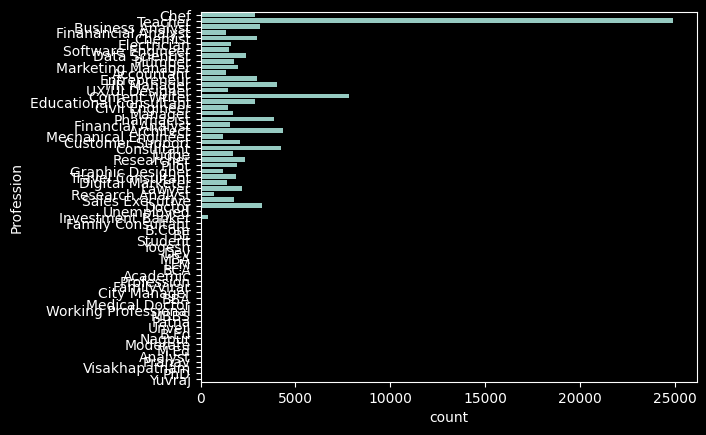

In [844]:
sns.countplot(train_data_raw.loc[:,"Profession"])

In [845]:
# def replace_rare_professions(data: pd.Series, threshold: int = 10) -> pd.Series:
#     counts = data.value_counts()
#     professions_mapping = {}
#     for i, val in counts.items():
#         if val < threshold:
#             professions_mapping.update({i:"Rare Profession"})
#         else:
#             continue

#     return data.replace(professions_mapping)

In [846]:
processed_data['Profession'], train_prof_map = replace_rare_occurenced(data=processed_data['Profession'], replace_with='Rare Profession')

#### Degree

In [847]:
processed_data['Degree'], train_degree_map = replace_rare_occurenced(data=processed_data['Degree'], replace_with='Rare Degree')

#### City

In [848]:
processed_data['City'], train_city_map = replace_rare_occurenced(data=processed_data['City'], replace_with='Rare City', threshold=100)

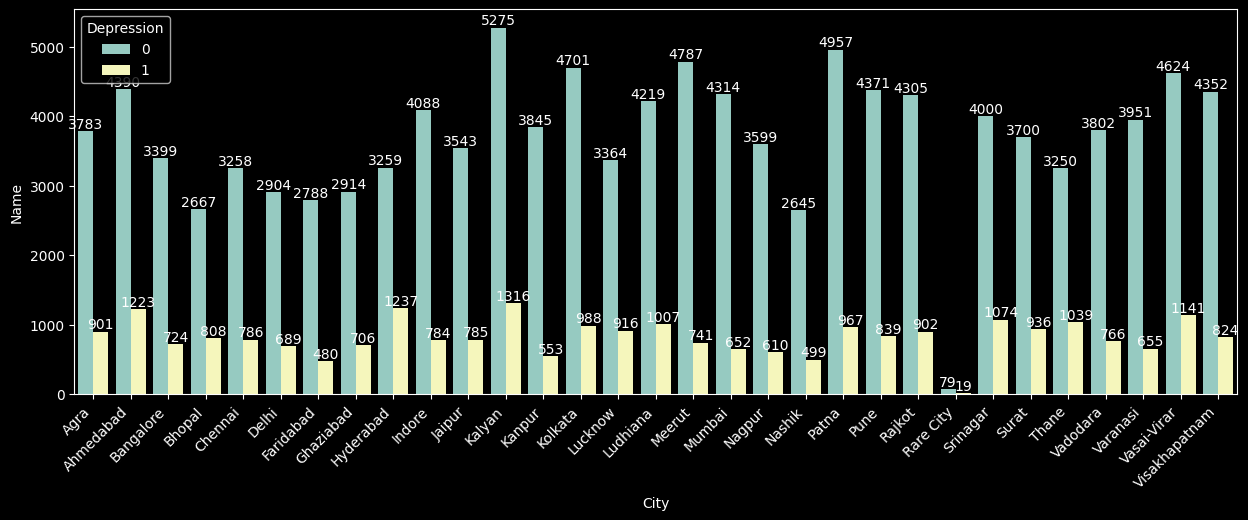

In [849]:
plt.figure(figsize=(15,5))
ax= sns.barplot(data=g, x=g['City'], y='Name', hue=TARGET)
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

# Exploration

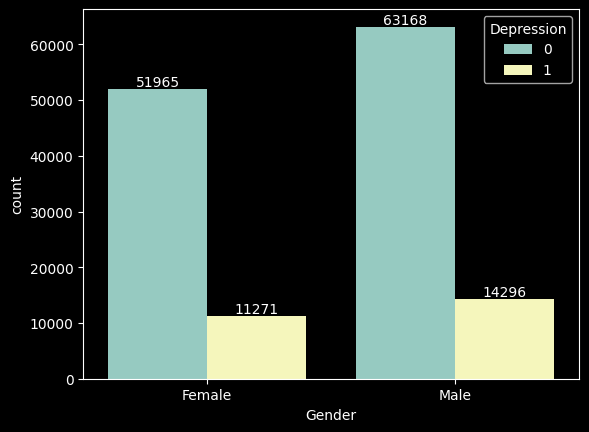

In [850]:
ax = sns.countplot(data=processed_data, x='Gender', hue='Depression')
annot_plot(ax)

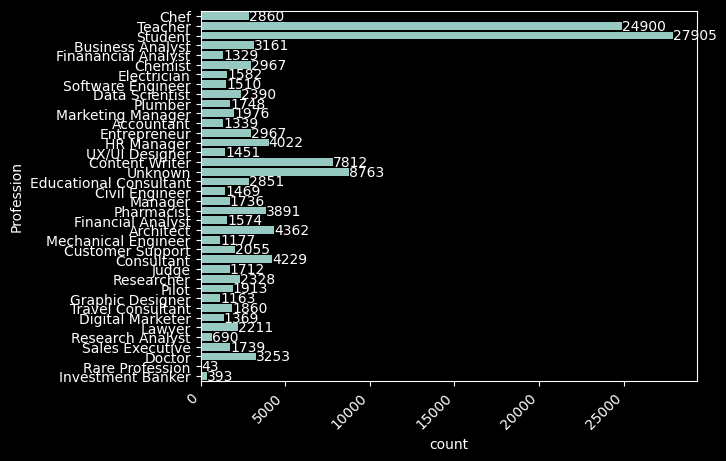

In [851]:
# ax = sns.countplot(processed_data.loc[processed_data["Profession"].isin(processed_data['Profession'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Profession' ]], x='Profession')
ax = sns.countplot(processed_data.loc[:,"Profession"])
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [852]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             140700 non-null  object 
 6   Academic Pressure                      140700 non-null  float64
 7   Work Pressure                          140700 non-null  float64
 8   CGPA                                   140700 non-null  float64
 9   Study Satisfaction                     140700 non-null  float64
 10  Job Satisfaction                       140700 non-null  float

In [853]:
processed_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,3.952381,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0
1,Vivan,Male,1.761905,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1
2,Yuvraj,Male,2.428571,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,Male,1.380952,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1
4,Rhea,Female,2.142857,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0


# Random forest

In [854]:
from sklearn.ensemble import RandomForestClassifier

In [855]:
rf = RandomForestClassifier()

## Encoding

### Label: `City`, `Profession`, `Degree`

In [856]:
from sklearn.preprocessing import LabelEncoder

In [857]:
city_lbl_enc = LabelEncoder()
prof_lbl_enc = LabelEncoder()
deg_lbl_enc = LabelEncoder()

In [858]:
processed_data['Profession'] = prof_lbl_enc.fit_transform(processed_data['Profession'])
processed_data['City']       = city_lbl_enc.fit_transform(processed_data['City'])
processed_data['Degree']     = deg_lbl_enc.fit_transform(processed_data['Degree'])


### OneHot: `Sleep Duration`, `Dietry Habits`

In [859]:
from sklearn.preprocessing import OneHotEncoder

In [860]:
sleep_oh_enc = OneHotEncoder().fit(processed_data[['Sleep Duration']])
diet_oh_enc = OneHotEncoder().fit(processed_data[['Dietary Habits']])

In [861]:
ohe_diet = pd.DataFrame(data=diet_oh_enc.transform(processed_data[['Dietary Habits']]).toarray(),
             columns=diet_oh_enc.get_feature_names_out())

In [862]:
ohe_sleep = pd.DataFrame(data=sleep_oh_enc.transform(processed_data[['Sleep Duration']]).toarray(),
             columns=sleep_oh_enc.get_feature_names_out())

In [863]:
encoded_data = pd.concat([processed_data, ohe_sleep, ohe_diet], axis=1)
encoded_data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_Unknown
0,Aaradhya,Female,3.952381,15,Working Professional,3,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,9,0,1.0,2.0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Vivan,Male,1.761905,28,Working Professional,34,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,12,1,7.0,3.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Yuvraj,Male,2.428571,30,Student,33,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,3,1,3.0,1.0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Yuvraj,Male,1.380952,17,Working Professional,34,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,6,1,10.0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Rhea,Female,2.142857,12,Working Professional,2,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,6,1,9.0,4.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,1.000000,1,Working Professional,37,0.0,5.0,0.00,0.0,4.0,5-6 hours,Unhealthy,11,0,2.0,4.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140696,Lata,Female,3.190476,8,Working Professional,7,0.0,5.0,0.00,0.0,4.0,7-8 hours,Moderate,4,1,6.0,5.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140697,Aanchal,Female,1.571429,13,Working Professional,23,0.0,3.0,0.00,0.0,1.0,More than 8 hours,Moderate,1,0,4.0,4.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
140698,Prachi,Female,3.952381,24,Working Professional,27,0.0,5.0,0.00,0.0,2.0,5-6 hours,Moderate,23,1,10.0,1.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [864]:
# diet_oh_enc.tranform(processed_data[['Dietary Habits']]).toarray()
# sleep_oh_enc.tranform(processed_data[['Sleep Duration']]).toarray()

In [865]:
pd.options.display.max_columns = None

In [866]:
encoded_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_Unknown
0,Aaradhya,Female,3.952381,15,Working Professional,3,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,9,0,1.0,2.0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Vivan,Male,1.761905,28,Working Professional,34,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,12,1,7.0,3.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Yuvraj,Male,2.428571,30,Student,33,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,3,1,3.0,1.0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Yuvraj,Male,1.380952,17,Working Professional,34,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,6,1,10.0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Rhea,Female,2.142857,12,Working Professional,2,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,6,1,9.0,4.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [867]:
#TODO: encoded `working professional or student` to binary: i.e: student then 0 or 1

In [868]:
encoded_data['is_Student'] = np.where(encoded_data['Working Professional or Student']=='Student', 1, 0)
encoded_data['is_Male'] = np.where(encoded_data['Gender']=='Male', 1, 0)


train_df = encoded_data.copy()
train_df.drop(['Working Professional or Student'], axis=1, inplace=True)
train_df.drop(['Gender'], axis=1, inplace=True)
train_df.drop(['Sleep Duration'], axis=1, inplace=True)
train_df.drop(['Dietary Habits'], axis=1, inplace=True)


# dropping the `Name` feature for irrelevance.
train_df.drop(['Name'], axis=1, inplace=True)

train_df.head()

,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_Unknown,is_Student,is_Male
0,3.952381,15,3,0.0,5.0,0.00,0.0,2.0,9,0,1.0,2.0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1.761905,28,34,0.0,4.0,0.00,0.0,3.0,12,1,7.0,3.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
2,2.428571,30,33,5.0,0.0,8.97,2.0,0.0,3,1,3.0,1.0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
3,1.380952,17,34,0.0,5.0,0.00,0.0,1.0,6,1,10.0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
4,2.142857,12,2,0.0,1.0,0.00,0.0,1.0,6,1,9.0,4.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


## Splitting

In [869]:
X_train = train_df.drop(TARGET, axis=1).iloc[:-100]
y_train = train_df[TARGET].iloc[:-100]
X_val = train_df.drop(TARGET, axis=1).iloc[-100:]
y_val = train_df[TARGET].iloc[-100:]

## Training

In [870]:
rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

### Validation

In [871]:
from sklearn.metrics import accuracy_score

In [872]:
val_results = rf.predict(X_val)

In [873]:
accuracy_score(y_true=y_val, y_pred=val_results)

0.87

## Testing

In [874]:
test_data= pd.read_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\data\test.csv",
                        index_col='id')

In [875]:
test_data.loc[test_data['Working Professional or Student']=='Student', 'Profession'] = 'Student'
test_data['Profession'] = test_data['Profession'].fillna("Unknown")


In [876]:
test_data.loc[test_data['Working Professional or Student'] =='Working Professional', 'Academic Pressure'] = 0 
test_data.loc[test_data['Working Professional or Student'] =='Working Professional', 'CGPA'] = 0 
test_data.loc[test_data['Working Professional or Student'] =='Working Professional', 'Study Satisfaction'] = 0 



In [877]:
test_data.loc[test_data['Working Professional or Student'] =='Student', 'Work Pressure']    = 0 
test_data.loc[test_data['Working Professional or Student'] =='Student', 'Job Satisfaction'] = 0

In [878]:
test_data['Academic Pressure']  = fillna_no0_mode(test_data['Academic Pressure'])
test_data['Work Pressure']      = fillna_no0_mode(test_data['Work Pressure'])
test_data['CGPA']               = fillna_no0_mode(test_data['CGPA'])
test_data['Study Satisfaction'] = fillna_no0_mode(test_data['Study Satisfaction'])
test_data['Job Satisfaction']   = fillna_no0_mode(test_data['Job Satisfaction'])
test_data['Financial Stress']   = fillna_no0_mode(test_data['Financial Stress'])
test_data['Degree']             = fillna_no0_mode(test_data['Degree'])
test_data['Dietary Habits']    = fillna_no0_mode(test_data['Dietary Habits'])

In [879]:
cols_w_nulls_test = test_data.columns[test_data.isnull().any()].tolist()
print(cols_w_nulls)

[]


In [880]:
with_nulls_test = test_data[cols_w_nulls_test].isnull().sum() / len(test_data[cols_w_nulls_test])
with_nulls_test._name = "proportion_of_nulls"
with_nulls_test

Series([], Name: proportion_of_nulls, dtype: float64)

In [881]:
processed_test = preprocess(data=test_data,
                            yes_no_cols=YES_NO_COLS, 
                            )

processed_test.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,4.333333,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,LLB,0,9.0,3.0,1
140701,Sanya,Female,4.809524,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,B.Ed,0,6.0,4.0,0
140702,Yash,Male,4.333333,Jaipur,Working Professional,Teacher,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,B.Arch,1,12.0,4.0,0
140703,Nalini,Female,1.476190,Rajkot,Student,Student,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,BSc,1,10.0,4.0,0
140704,Shaurya,Male,3.761905,Kalyan,Working Professional,Teacher,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,BCA,1,3.0,4.0,0


In [882]:
processed_test['Sleep Duration'] = match_sleep_hours_strings(processed_test, sleeping_hours_str=sleeping_hours)


In [883]:
processed_test.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,4.333333,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,LLB,0,9.0,3.0,1
140701,Sanya,Female,4.809524,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,B.Ed,0,6.0,4.0,0
140702,Yash,Male,4.333333,Jaipur,Working Professional,Teacher,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,B.Arch,1,12.0,4.0,0
140703,Nalini,Female,1.476190,Rajkot,Student,Student,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,BSc,1,10.0,4.0,0
140704,Shaurya,Male,3.761905,Kalyan,Working Professional,Teacher,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,BCA,1,3.0,4.0,0


In [884]:
processed_test['Profession'] = processed_test['Profession'].replace(train_prof_map)
processed_test['Degree'] = processed_test['Degree'].replace(train_degree_map)
processed_test['City'] = processed_test['City'].replace(train_city_map)

In [885]:
prof_lbl = prof_lbl_enc.inverse_transform(processed_data['Profession']).tolist()
city_lbl = city_lbl_enc.inverse_transform(processed_data['City']).tolist()
deg_lbl = deg_lbl_enc.inverse_transform(processed_data['Degree']).tolist()

In [886]:
'Rare Degree' in deg_lbl

True

In [887]:
processed_test['Profession'] = processed_test['Profession'].apply(lambda x: x if x in prof_lbl else 'Unknown')
processed_test['City'] = processed_test['City'].apply(lambda x: x if x in city_lbl else 'Rare City')
processed_test['Degree'] = processed_test['Degree'].apply(lambda x: x if x in deg_lbl else 'Rare Degree')

In [888]:
processed_test['Profession'] = prof_lbl_enc.transform(processed_test['Profession'])
processed_test['City']       = city_lbl_enc.transform(processed_test['City'])
processed_test['Degree']     = deg_lbl_enc.transform(processed_test['Degree'])


In [889]:
processed_test.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,4.333333,30,Working Professional,20,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,12,0,9.0,3.0,1
140701,Sanya,Female,4.809524,13,Working Professional,12,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,2,0,6.0,4.0,0
140702,Yash,Male,4.333333,10,Working Professional,34,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,0,1,12.0,4.0,0
140703,Nalini,Female,1.476190,22,Student,33,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,10,1,10.0,4.0,0
140704,Shaurya,Male,3.761905,11,Working Professional,34,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,7,1,3.0,4.0,0


In [890]:
ohe_diet_test = pd.DataFrame(data=diet_oh_enc.transform(processed_test[['Dietary Habits']]).toarray(),
             columns=diet_oh_enc.get_feature_names_out())

In [891]:
ohe_sleep_test = pd.DataFrame(data=sleep_oh_enc.transform(processed_test[['Sleep Duration']]).toarray(),
             columns=sleep_oh_enc.get_feature_names_out())

In [893]:
test_ohe_enc = pd.concat([ohe_sleep_test, ohe_diet_test], axis=1)

In [896]:
test_ohe_enc.index = processed_test.index

In [ ]:
stop

In [900]:
processed_data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Unknown'], dtype=object)

In [901]:
processed_test['Sleep Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       'Unknown'], dtype=object)

In [897]:
encoded_data_test = pd.concat([processed_test, test_ohe_enc], axis=1)
encoded_data_test

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_Unknown
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,4.333333,30,Working Professional,20,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,12,0,9.0,3.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
140701,Sanya,Female,4.809524,13,Working Professional,12,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,2,0,6.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
140702,Yash,Male,4.333333,10,Working Professional,34,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,0,1,12.0,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140703,Nalini,Female,1.476190,22,Student,33,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,10,1,10.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
140704,Shaurya,Male,3.761905,11,Working Professional,34,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,7,1,3.0,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Zoya,Female,3.952381,10,Working Professional,26,0.0,3.0,0.00,0.0,5.0,Less than 5 hours,Moderate,10,1,2.0,2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
234496,Shlok,Male,2.047619,1,Working Professional,26,0.0,5.0,0.00,0.0,1.0,7-8 hours,Moderate,8,1,11.0,3.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
234497,Rishi,Male,1.571429,30,Student,33,1.0,0.0,7.51,4.0,0.0,7-8 hours,Moderate,4,0,7.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [898]:
encoded_data_test['is_Student'] = np.where(encoded_data_test['Working Professional or Student']=='Student', 1, 0)
encoded_data_test['is_Male'] = np.where(encoded_data_test['Gender']=='Male', 1, 0)


test_df = encoded_data_test.copy()
test_df.drop(['Working Professional or Student'], axis=1, inplace=True)
test_df.drop(['Gender'], axis=1, inplace=True)
test_df.drop(['Sleep Duration'], axis=1, inplace=True)
test_df.drop(['Dietary Habits'], axis=1, inplace=True)


# dropping the `Name` feature for irrelevance.
test_df.drop(['Name'], axis=1, inplace=True)

test_df.head()

,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Unknown,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_Unknown,is_Student,is_Male
id,,,,,,,,,,,,,,,,,,,,,,,,
140700,4.333333,30,20,0.0,2.0,0.00,0.0,5.0,12,0,9.0,3.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
140701,4.809524,13,12,0.0,2.0,0.00,0.0,4.0,2,0,6.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
140702,4.333333,10,34,0.0,4.0,0.00,0.0,1.0,0,1,12.0,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
140703,1.476190,22,33,5.0,0.0,6.84,1.0,0.0,10,1,10.0,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
140704,3.761905,11,34,0.0,5.0,0.00,0.0,5.0,7,1,3.0,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1


In [903]:
test_results =  rf.predict(test_df)
test_results

array([0, 0, 0, ..., 0, 1, 0])

In [906]:
results_df = pd.DataFrame(data=test_results, index=test_df.index, columns=[TARGET])
results_df.head()

,Depression
id,
140700,0
140701,0
140702,0
140703,1
140704,0


In [ ]:
# results_df.to_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\results\basic_rf_results.csv")

# XGBoost

In [908]:
from xgboost import XGBClassifier

In [910]:
xgb = XGBClassifier()

In [911]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [912]:
xgb_val_results = xgb.predict(X_val)
accuracy_score(y_true=y_val, y_pred=xgb_val_results)

0.91

In [913]:
xgb_test_results = xgb.predict(test_df)
xgb_results_df = pd.DataFrame(data=xgb_test_results, index=test_df.index, columns=[TARGET])
xgb_results_df.head()

,Depression
id,
140700,0
140701,0
140702,0
140703,1
140704,0


In [914]:
results_df.to_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\results\basic_xgb_results.csv")